In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from wordcloud import WordCloud
#! pip install yellowbrick

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load the dataset
article_data = pd.read_csv('/content/drive/MyDrive/dailykos.csv')

In [5]:
# Reading the dataset
print(article_data.shape)
print(article_data.head())

(3430, 1545)
   abandon  abc  ability  abortion  absolute  abstain  abu  abuse  accept  \
0        0    0        0         0         0        0    0      0       0   
1        0    0        0         0         0        0    0      0       0   
2        0    0        0         0         0        1    0      0       0   
3        0    0        0         0         0        0    0      0       0   
4        0    0        0         0         0        0    0      0       0   

   access  ...  yeah  year  yesterday  york  youll  young  youre  youve  \
0       0  ...     0     0          0     0      0      0      0      0   
1       0  ...     0     0          0     0      0      0      0      0   
2       0  ...     0     0          0     0      0      0      0      0   
3       0  ...     0     0          2     0      0      1      0      0   
4       0  ...     0     1          1     0      0      1      0      0   

   zogby  zone  
0      0     1  
1      0     0  
2      0     0  
3    

In [6]:
print(article_data.describe())

           abandon          abc      ability     abortion     absolute  \
count  3430.000000  3430.000000  3430.000000  3430.000000  3430.000000   
mean      0.020408     0.034694     0.032362     0.035277     0.018659   
std       0.157046     0.250326     0.185040     0.385177     0.145713   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       2.000000     6.000000     2.000000    10.000000     3.000000   

           abstain          abu        abuse       accept       access  ...  \
count  3430.000000  3430.000000  3430.000000  3430.000000  3430.000000  ...   
mean      0.024781     0.053061     0.050146     0.054810     0.028280  ...   
std       0.155481     0.498567     0.443801     0.289656     0.197872  ...   
min       0.00000

In [7]:
# Each row represents an article, and each column represents a word.
# The values indicate how many times a word appears in an article.

# 1. Building a hierarchical clustering model

In [8]:
# Calculate Euclidean distances between articles
euclidean_distances = pairwise_distances(article_data, metric='euclidean')

In [9]:
# Perform hierarchical clustering using Ward linkage
ward_linkage_matrix = ward(euclidean_distances)

/usr/local/lib/python3.10/dist-packages/scipy/cluster/hierarchy.py:833: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


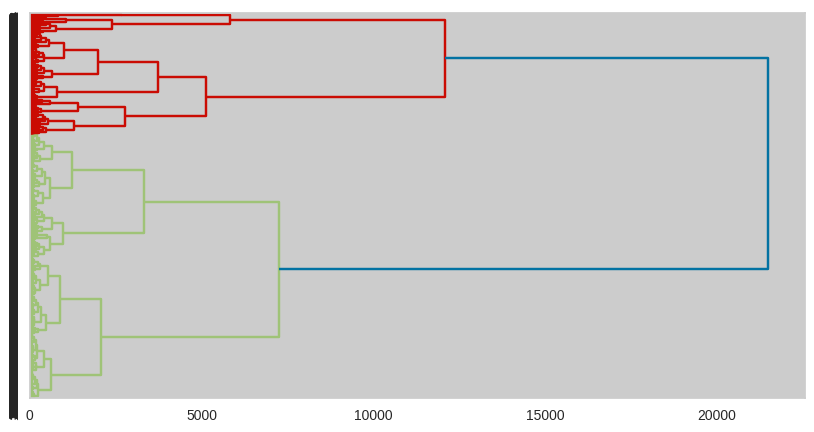

In [10]:
# Plot the dendrogram
fig, ax = plt.subplots(figsize=(10, 5))
ax = dendrogram(ward_linkage_matrix,orientation='right', leaf_rotation=90, leaf_font_size=8)

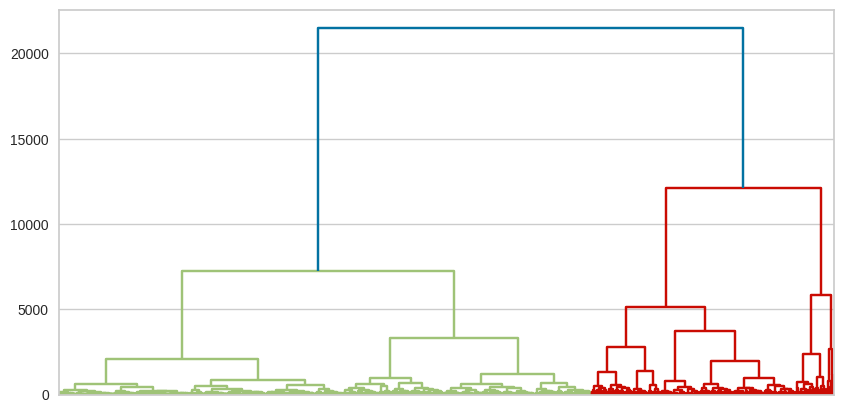

In [11]:
# Remove x-axis labels for better visualization
fig, ax = plt.subplots(figsize=(10, 5))
dendrogram(ward_linkage_matrix, leaf_rotation=90, leaf_font_size=8)
ax.set_xticks([])  # Remove x-axis ticks
plt.show()

Creating the distances may take time because there are many articles (n) and a high number of dimensions (1545 variables).
The number of pairwise distances to compute is n(n-1)/2, and with high-dimensional data, it's computationally expensive.

# 2. Choosing the number of clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

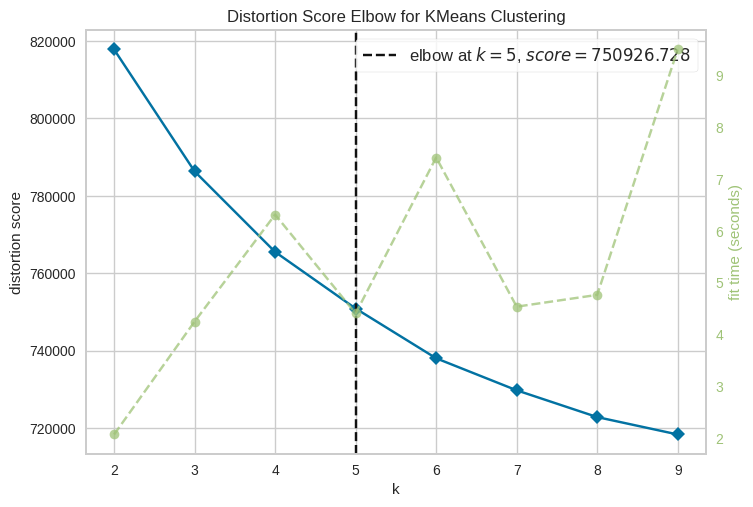

Axes(0.125,0.11;0.775x0.77)


In [12]:
#Elbow method to decide the optimal number of clusters
km=KMeans(random_state=42)
viz=KElbowVisualizer(km,k=(2,10))
viz.fit(article_data)
print(viz.show())

To cluster news articles, a good choice for the number of clusters could be 5, through the elbow mthd above. This allows readers to choose between articles biased towards
1. Democrats
2. Republicans
3. War
4. Foreign Policy
5. Elections

# 3. Analyzing clusters - Hierarchial Clustering

In [13]:
num_clusters = 7
hierarchical_clustering = AgglomerativeClustering(n_clusters=num_clusters, linkage="ward", affinity="euclidean")
hierarchical_clustering.fit(article_data)
hierarchical_labels = hierarchical_clustering.labels_ +1
cluster_counts = pd.Series(hierarchical_labels).value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [14]:
cluster_counts

3    1761
1     803
4     324
5     270
2     167
6      55
7      50
dtype: int64

In [45]:
# Number of observations in cluster 3
print("Number of observations in cluster 3:", cluster_counts[3])
# Cluster with the most observations
print("Cluster with the most observations:", cluster_counts.idxmax())
# Cluster with the fewest observations
print("Cluster with the fewest observations:", cluster_counts.idxmin())

Number of observations in cluster 3: 1761
Cluster with the most observations: 3
Cluster with the fewest observations: 7


In [23]:
silhouette_score(article_data, hierarchical_labels)

0.07102441653679625

# 4. Most frequent words in cluster 1

In [25]:
cluster1_means = article_data[hierarchical_labels == 1].mean().sort_values(ascending=False) # Computing the mean of the values in cluster 1 and sorting them in descending order.
top6_words = cluster1_means.head(6)
print("Top 6 words in cluster 1:")
print(top6_words)
most_frequent_word = top6_words.idxmax()
print("Most frequent word in cluster 1:", most_frequent_word)
print(f'The most frequent word in cluster 1 in terms of average value is "{most_frequent_word}" with a mean frequency of {top6_words[most_frequent_word]}.')

Top 6 words in cluster 1:
poll          2.429639
kerry         2.012453
bush          1.922790
democrat      1.823163
republican    1.328767
elect         1.165629
dtype: float64
Most frequent word in cluster 1: poll
The most frequent word in cluster 1 in terms of average value is "poll" with a mean frequency of 2.4296388542963885.


In [63]:
topword=article_data[hierarchical_labels == 1]
topword

,abandon,abc,ability,abortion,absolute,abstain,abu,abuse,accept,access,...,yeah,year,yesterday,york,youll,young,youre,youve,zogby,zone
3,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
19,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3383,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3390,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3410,0,0,0,1,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3415,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
def corpus_word_clouds(cluster_id):
  topwords=article_data[hierarchical_labels == 1].sum()
  word_


abandon      17
abc          26
ability      29
abortion     46
absolute     13
           ... 
young        28
youre        53
youve        22
zogby       164
zone         11
Length: 1545, dtype: int64

# 5: Determine clusters related to Iraq War and Democratic Party

In [29]:
# Define a function to find top words in a specific cluster
def top_words_in_cluster(data, cluster_number, labels, num_words=6):
    grouped_data = data.groupby(labels)
    cluster_means = grouped_data.get_group(cluster_number).mean().sort_values(ascending=False)
    top_words = cluster_means.head(num_words)
    print("Top " + str(num_words) + " words in cluster " + str(int(cluster_number)))
    print(top_words)
    print("\n")

top_words_in_cluster(article_data, 1, hierarchical_labels, 6)

Top 6 words in cluster 1
poll          2.429639
kerry         2.012453
bush          1.922790
democrat      1.823163
republican    1.328767
elect         1.165629
dtype: float64




In [30]:
# Looping through all the clusters to get top 6 frequent words in each cluster.
for i in range(1,8):
    top_words_in_cluster(article_data, i, hierarchical_labels, 6)

Top 6 words in cluster 1
poll          2.429639
kerry         2.012453
bush          1.922790
democrat      1.823163
republican    1.328767
elect         1.165629
dtype: float64


Top 6 words in cluster 2
kerry       8.101796
bush        7.574850
campaign    1.862275
poll        1.736527
presided    1.616766
democrat    1.389222
dtype: float64


Top 6 words in cluster 3
bush          1.546281
democrat      0.659852
kerry         0.607609
state         0.542873
presided      0.526973
republican    0.519591
dtype: float64


Top 6 words in cluster 4
november     10.376543
poll          4.851852
vote          4.376543
challenge     4.104938
democrat      2.858025
bush          2.858025
dtype: float64


Top 6 words in cluster 5
bush              4.777778
iraq              3.425926
war               2.470370
administration    2.225926
american          1.633333
presided          1.488889
dtype: float64


Top 6 words in cluster 6
dean         12.309091
kerry         5.345455
democrat      3.5

According to top 6 frequent words in the 7 clusters, Cluster 5 corresponds to the Iraq War since it has most frequent words related to Iraq War such as 'Iraq' and 'war', and Cluster 6 is related to the Democratic Party since it has most frequent words related to Democratic party such as 'democrat', 'kerry', 'candidate'.

# 6. Clustering using K-Means

In [32]:
# Perform clustering using K-Means with 7 clusters
num_clusters = 7
kmeans_clustering = KMeans(n_clusters=num_clusters, random_state=1000)
kmeans_clustering.fit(article_data)
kmeans_labels = kmeans_clustering.labels_+1
kmeans_cluster_counts = pd.Series(kmeans_labels).value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [33]:
kmeans_cluster_counts

2    1937
4     368
1     339
3     330
7     264
5     153
6      39
dtype: int64

In [35]:
# Number of observations in cluster 3
print("Number of observations in cluster 3:", kmeans_cluster_counts[3])

# Cluster with the most observations
most_observed_cluster = kmeans_cluster_counts.idxmax()
print("Cluster with the most observations:", most_observed_cluster, kmeans_cluster_counts[most_observed_cluster]) # Adding 1 to the index of the cluster number in order to get the actual cluster.

# Cluster with the fewest observations
fewest_observed_cluster = kmeans_cluster_counts.idxmin()
print("Cluster with the fewest observations:", fewest_observed_cluster, kmeans_cluster_counts[fewest_observed_cluster]) # Adding 1 to the index of the cluster number in order to get the actual cluster.

Number of observations in cluster 3: 330
Cluster with the most observations: 2 1937
Cluster with the fewest observations: 6 39


# 7. Most frequent words in K-Means clusters

In [65]:
def top_words_in_kmeans_cluster(data, labels, cluster_num, num_words=6):
    cluster_means = data[labels == cluster_num].mean().sort_values(ascending=False)
    top_words = cluster_means.head(num_words)
    return top_words

for i in range(1,num_clusters+1):
    top_words = top_words_in_kmeans_cluster(article_data, kmeans_labels, i)
    print(f"Top words in cluster {i}:")
    print(top_words)
    print("\n")

Top words in cluster 1:
democrat      3.064897
republican    2.920354
state         2.094395
elect         1.970501
parties       1.793510
vote          1.643068
dtype: float64


Top words in cluster 2:
bush        1.183789
kerry       0.799690
poll        0.724832
democrat    0.631905
general     0.505421
elect       0.488384
dtype: float64


Top words in cluster 3:
november     10.369697
poll          4.863636
vote          4.439394
challenge     4.127273
bush          3.081818
democrat      2.866667
dtype: float64


Top words in cluster 4:
bush        8.635870
kerry       4.934783
poll        2.160326
presided    1.853261
campaign    1.331522
democrat    1.312500
dtype: float64


Top words in cluster 5:
dean        7.725490
kerry       5.261438
clark       2.993464
edward      2.862745
democrat    2.633987
poll        2.326797
dtype: float64


Top words in cluster 6:
democrat      15.615385
parties        6.589744
republican     6.153846
state          4.846154
senate         4.4102

Determine which K-Means clusters correspond to the Iraq War and Democratic Party

Cluster 5 corresponds to the Iraq War since it has terms like 'iraq', 'war' in it's most frequent words, Clusters 1, 2, 3, and 6 has almost terms related to democrat party such as 'democrat' and 'Kerry' but among all cluster 6 is more suitable for democratic party because the term 'kerry', the presidential candidate for democratic party, has the highest mean frequency in cluster 6.

# 8. Correspondence between Hierarchical Clusters and K-Means Clusters

In [38]:
# Create a contingency table to compare Hierarchical Clusters and K-Means Clusters
contingency_table = pd.crosstab(hierarchical_labels, kmeans_labels)
print(contingency_table)

col_0    1     2    3    4   5   6    7
row_0                                  
1      240   367    1   97  89   4    5
2        2    38    4  114   6   0    3
3       75  1509    0   94   4   0   79
4        0     0  324    0   0   0    0
5       10    23    0   59   0   1  177
6        0     0    0    0  54   1    0
7       12     0    1    4   0  33    0


In [39]:
# Find the Hierarchical Cluster corresponding to K-Means Cluster 2
corresponding_hierarchical_cluster_2 = contingency_table[2].idxmax()

In [40]:
# Find the Hierarchical Cluster corresponding to K-Means Cluster 3
corresponding_hierarchical_cluster_3 = contingency_table[3].idxmax()

In [43]:
print("Corresponding Hierarchical Cluster to K-Means Cluster 2:", corresponding_hierarchical_cluster_2 )
print("Corresponding Hierarchical Cluster to K-Means Cluster 3:", corresponding_hierarchical_cluster_3 )

Corresponding Hierarchical Cluster to K-Means Cluster 2: 3
Corresponding Hierarchical Cluster to K-Means Cluster 3: 4


In [44]:
# Therefore, the best hierarchical clusters corresponding to k-means cluster 2 and 3 are 3 and 4 repectively.